# Plotting data

In [1]:
import pandas as pd
global_confirmed = pd.read_csv("Data/time_series_covid19_confirmed_global.csv")
global_deaths = pd.read_csv("Data/time_series_covid19_deaths_global.csv")
global_recovered = pd.read_csv("Data/time_series_covid19_recovered_global.csv")
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [2]:
# Filter data
global_confirmed =  global_confirmed.drop(columns=["Long", "Lat", "Province/State"])
global_deaths =  global_deaths.drop(columns=["Long", "Lat", "Province/State"])
global_recovered =  global_recovered.drop(columns=["Long", "Lat", "Province/State"])
global_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,Albania,0,0,0,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,Algeria,0,0,0,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,Andorra,0,0,0,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [19]:
# Peru
peru_data_propia = pd.read_csv("Data/peru_data.csv")
peru_data_P1 = peru_data_propia[["P1","1D_P1","2D_P1"]]
peru_data_P2 = peru_data_propia[["P2","1D_P2","2D_P2"]]
peru_data_P3 = peru_data_propia[["P3","1D_P3","2D_P3"]]
peru_data_RecuAcu = peru_data_propia[["RA","1D_RA","2D_RA"]]
peru_data_FalleAcu = peru_data_propia[["FA","1D_FA","2D_FA"]]
peru_data_InfAcu = peru_data_propia[["CIA","1D_CIA","2D_CIA"]]
peru_data_Diaria = peru_data_propia[["1D_CIA","2D_CIA","1D_PTA","2D_PTA"]]

In [4]:
import matplotlib.pyplot as plt
def get_country_data(country):
    # Filter country
    country_confirmed = global_confirmed.loc[global_confirmed['Country/Region'] == country]
    country_deaths = global_deaths.loc[global_deaths['Country/Region'] == country]
    country_recovered = global_recovered.loc[global_recovered['Country/Region'] == country]
    
    country_confirmed = country_confirmed.rename(index={country_confirmed.index[0]:'confirmed'})
    country_deaths = country_deaths.rename(index={country_deaths.index[0]:'deaths'})
    country_recovered = country_recovered.rename(index={country_recovered.index[0]:'recovered'})
    
    country_data = pd.concat([country_confirmed, country_deaths, country_recovered]).T
    country_data = country_data.drop(index="Country/Region")
    return country_data

def plot_country_data(country_data):
    plt.rcParams['figure.figsize'] = [15, 8]
    ax = plt.gca()
    country_data.plot(kind='line',y='confirmed',ax=ax)
    country_data.plot(kind='line',y='deaths', color='red', ax=ax)
    country_data.plot(kind='line',y='recovered',ax=ax)
    plt.grid(color='r', linestyle='-', linewidth=0.5)
    plt.show()

In [5]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

import seaborn as sb

## Countries: Peru, Brazil, Chile, Argentina, Colombia, Ecuador

In [6]:
peru_data = get_country_data("Peru")
brazil_data = get_country_data("Brazil")
chile_data = get_country_data("Chile")
argentina_data = get_country_data("Argentina")
colombia_data = get_country_data("Colombia")
ecuador_data = get_country_data("Ecuador")

## Muertes en Sudamérica

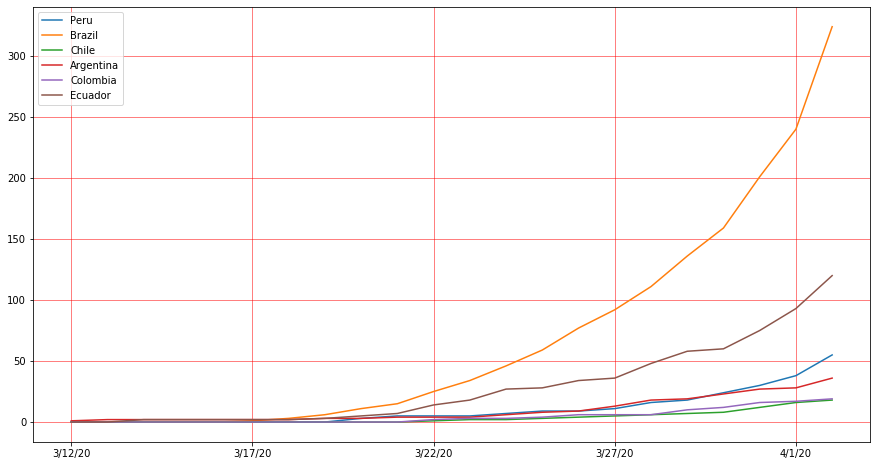

In [7]:
plt.rcParams['figure.figsize'] = [15, 8]
ax = plt.gca()
peru_data.loc['3/12/20':].plot(kind='line',y='deaths',label='Peru',ax=ax)
brazil_data.loc['3/12/20':].plot(kind='line',y='deaths',label='Brazil', ax=ax)
chile_data.loc['3/12/20':].plot(kind='line',y='deaths',label='Chile', ax=ax)
argentina_data.loc['3/12/20':].plot(kind='line',y='deaths',label='Argentina', ax=ax)
colombia_data.loc['3/12/20':].plot(kind='line',y='deaths',label='Colombia', ax=ax)
ecuador_data.loc['3/12/20':].plot(kind='line',y='deaths',label='Ecuador', ax=ax)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Recuperados en Sudamérica

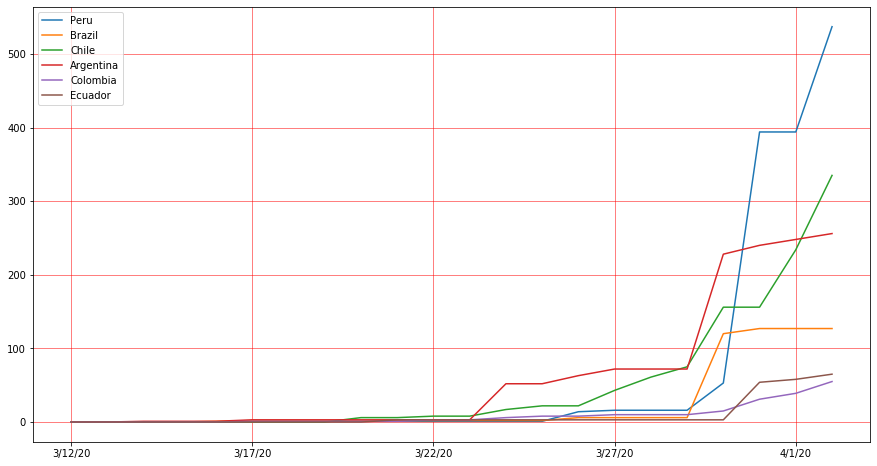

In [8]:
plt.rcParams['figure.figsize'] = [15, 8]
ax = plt.gca()
peru_data.loc['3/12/20':].plot(kind='line',y='recovered',label='Peru',ax=ax)
brazil_data.loc['3/12/20':].plot(kind='line',y='recovered',label='Brazil', ax=ax)
chile_data.loc['3/12/20':].plot(kind='line',y='recovered',label='Chile', ax=ax)
argentina_data.loc['3/12/20':].plot(kind='line',y='recovered',label='Argentina', ax=ax)
colombia_data.loc['3/12/20':].plot(kind='line',y='recovered',label='Colombia', ax=ax)
ecuador_data.loc['3/12/20':].plot(kind='line',y='recovered',label='Ecuador', ax=ax)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Confirmados en Sudamérica

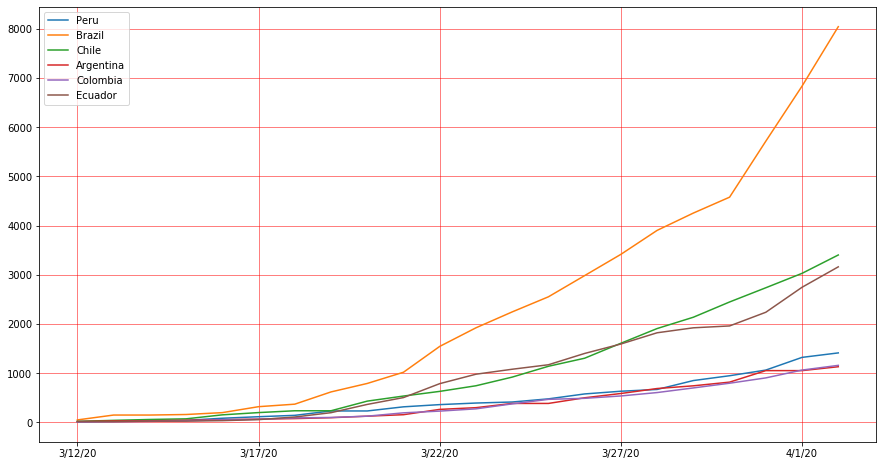

In [9]:
plt.rcParams['figure.figsize'] = [15, 8]
ax = plt.gca()
peru_data.loc['3/12/20':].plot(kind='line',y='confirmed',label='Peru',ax=ax)
brazil_data.loc['3/12/20':].plot(kind='line',y='confirmed',label='Brazil', ax=ax)
chile_data.loc['3/12/20':].plot(kind='line',y='confirmed',label='Chile', ax=ax)
argentina_data.loc['3/12/20':].plot(kind='line',y='confirmed',label='Argentina', ax=ax)
colombia_data.loc['3/12/20':].plot(kind='line',y='confirmed',label='Colombia', ax=ax)
ecuador_data.loc['3/12/20':].plot(kind='line',y='confirmed',label='Ecuador', ax=ax)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: correlación entre variables

In [10]:
print(peru_data_propia.corr())

             CIA    1D_CIA    2D_CIA       CDA       PTA    1D_PTA    2D_PTA  \
CIA     1.000000  0.864147  0.074689  0.958245  0.966258  0.757490  0.397929   
1D_CIA  0.864147  1.000000  0.502934  0.780815  0.792428  0.683602  0.515590   
2D_CIA  0.074689  0.502934  1.000000  0.039982  0.043714 -0.077521  0.169228   
CDA     0.958245  0.780815  0.039982  1.000000  0.999565  0.743199  0.287109   
PTA     0.966258  0.792428  0.043714  0.999565  1.000000  0.747548  0.299644   
1D_PTA  0.757490  0.683602 -0.077521  0.743199  0.747548  1.000000  0.741718   
2D_PTA  0.397929  0.515590  0.169228  0.287109  0.299644  0.741718  1.000000   
P1      0.939464  0.830062  0.129657  0.952923  0.955223  0.721583  0.308890   
1D_P1   0.133087  0.396240  0.599721  0.064552  0.071867 -0.129376 -0.024562   
2D_P1  -0.126471  0.131559  0.628061 -0.108947 -0.111175 -0.294618 -0.191576   
RA      0.926796  0.810909  0.068723  0.815070  0.829742  0.596945  0.351572   
1D_RA   0.338545  0.129043 -0.134331  0.

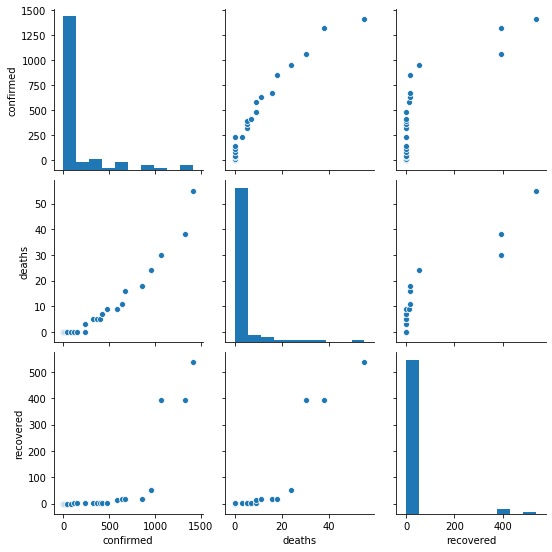

In [11]:
sb.pairplot(peru_data)

## Perú: porcentaje de acierto (100*infectados acumulados / pruebas totales) y sus razones de cambio

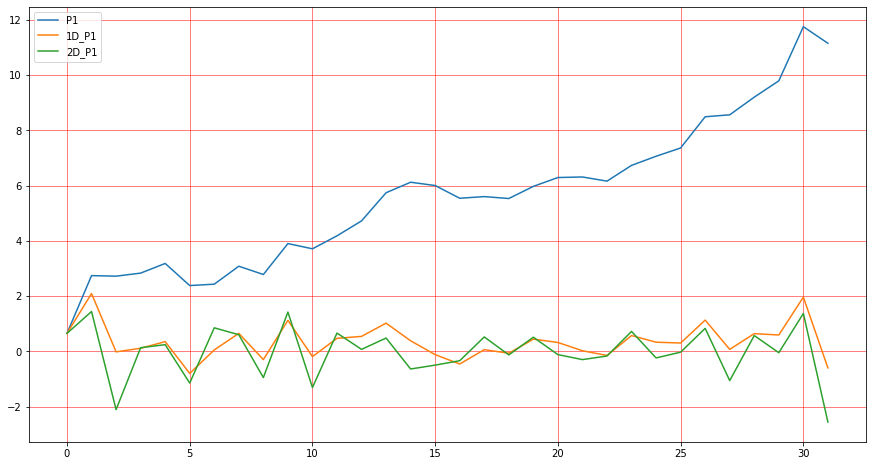

In [12]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_P1.loc[0:].plot()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: porcentaje de recuperados (100*recuperados acumulados / infectados acumulados) y sus razones de cambio

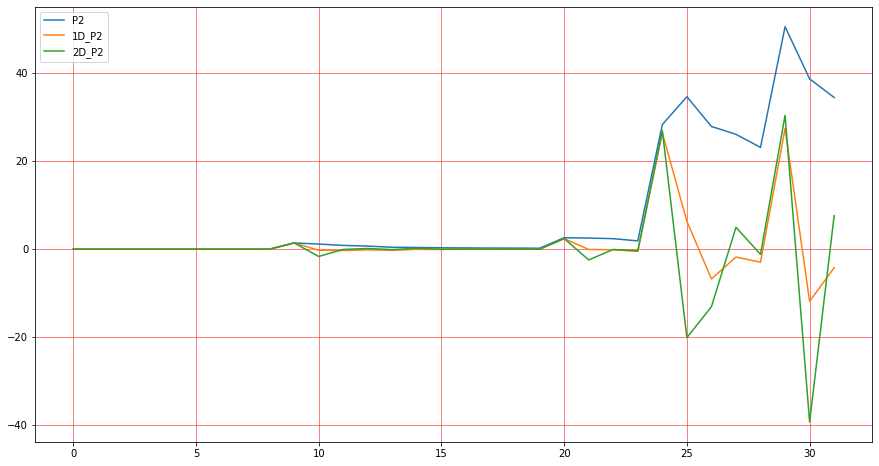

In [13]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_P2.loc[0:].plot()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: porcentaje de fallecidos (100*fallecidos acumulados / infectados acumulados) y sus razones de cambio

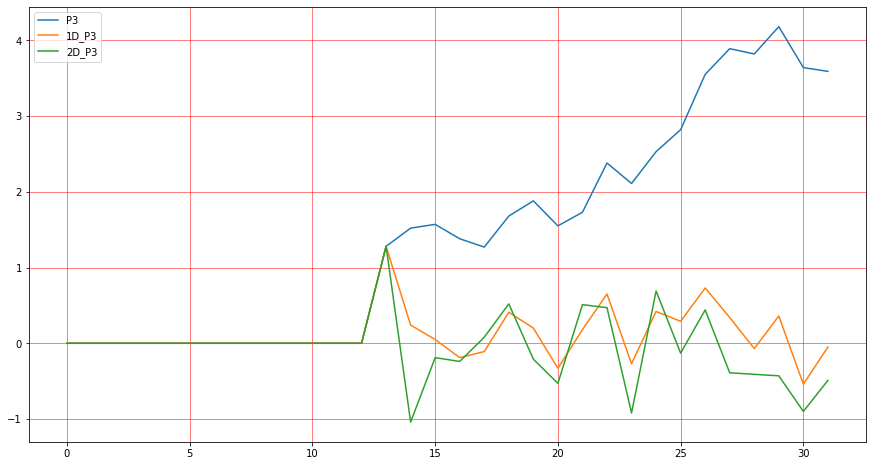

In [14]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_P3.loc[0:].plot()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: infectados, pruebas diarias y sus respectivas razones de cambio

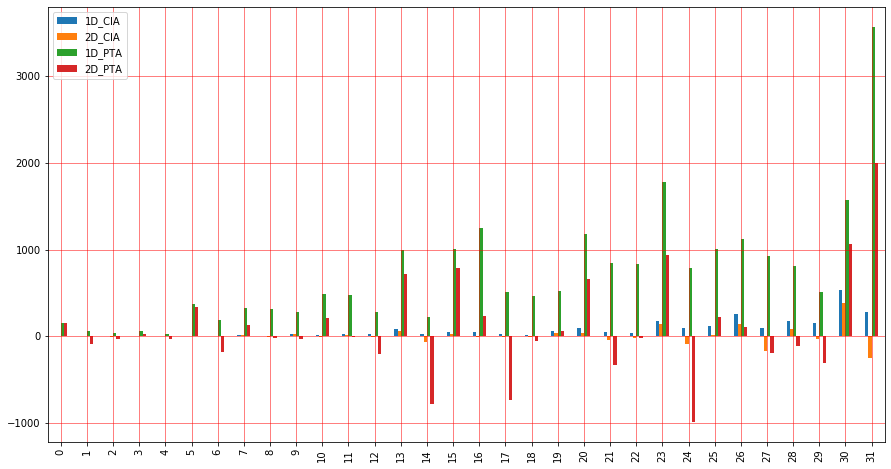

In [15]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_Diaria.loc[0:].plot.bar()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: infectados acumulados y sus razones de cambio

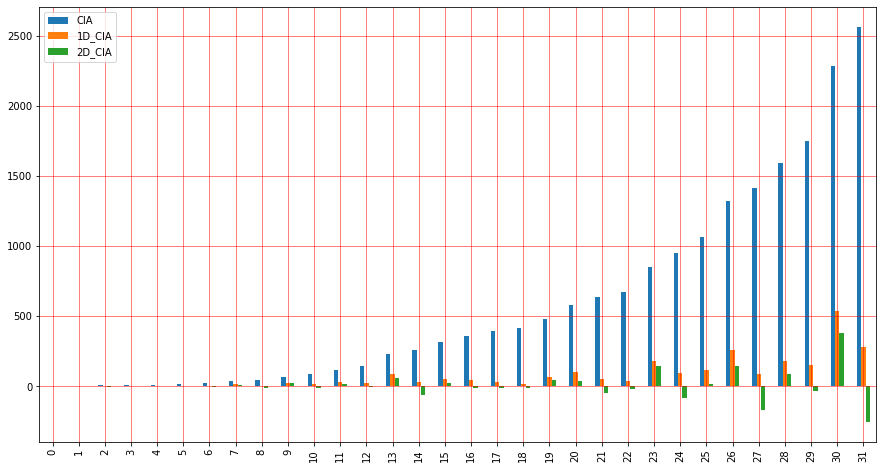

In [16]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_InfAcu.loc[0:].plot.bar()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: recuperados acumulados y sus razones de cambio

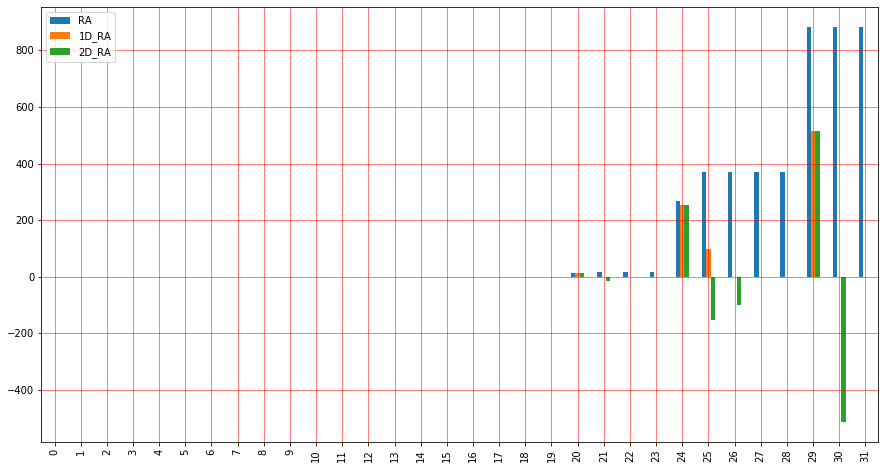

In [17]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_RecuAcu.loc[0:].plot.bar()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

## Perú: fallecidos acumulados y sus razones de cambio

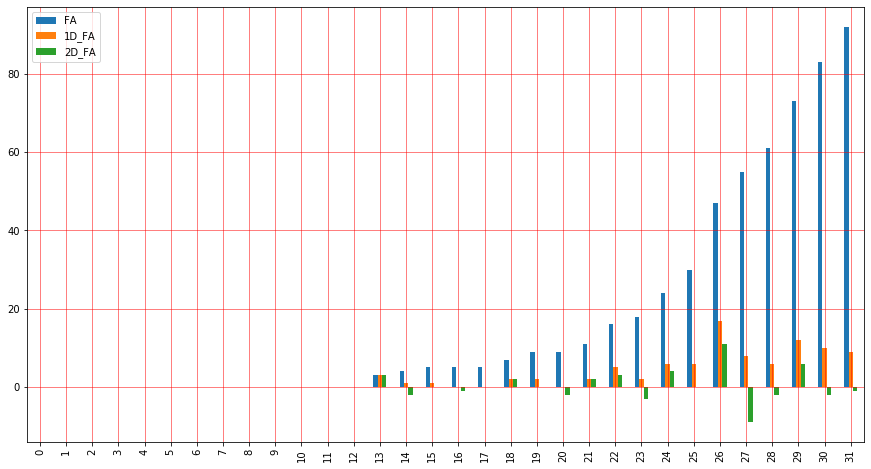

In [18]:
#Día 0 = 3/6/2020, cada número son los días transcurridos
plt.rcParams['figure.figsize'] = [15, 8]
peru_data_FalleAcu.loc[0:].plot.bar()
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()